# Introduction to Biology with Python 

> Adapted from Fatih Enes Kemal Ergin (https://notebook.community/eneskemalergin/OldBlog/_oldnotebooks/Biology_with_Python)

In this tutorial, we will give a brief introduction to biological concepts with theory and implementation in Python.


The beginning part will be for the programmers who has a little background on biology.  If you don't know anything about biology you should go to [Best Resources To Learn Molecular Biology For A Computer Scientist](https://www.biostars.org/p/3066/). If you have good background of Biology, you may go directly to the implementations.

## DNA, RNA, Protein

###DNA 
DNA or other wise called deoxyribonucleic acid is the building block of the life. It contains the information the cell requires to synthesize protein and to replicate itself, to be short it is the storage repository for the information that is required for any cell to function.

There are basically four nucleotide bases, which make up the DNA. Adenine (A), Guanine (G), Thymine (T) and Cytosine(C). A DNA sequence looks some thing like this "ATTGCTGAAGGTGCGG". 

DNA is measured according to the number of base pairs it consists of, usually in kBp or mBp(Kilo/Mega base pairs). Each base has its complementary base, which means in the double helical structure of DNA, A will have T as its complimentary and similarly G will have C.

The DNA is broken down into bits and is tightly wound into coils, which are called **chromosomes**; human beings have 23 pairs of chromosomes. These chromosomes are further broken down into smaller pieces of code called **Genes**. 

DNA is made up of four nucleotide bases, finding out the arrangement of the bases is called **DNA sequencing**, there are various methods for sequencing a DNA, it is usually carried out by a machine or by running the DNA sample over a gel otherwise called gel electrophoresis.

###RNA

RNA is somewhat similar to DNA; they both are nucleic acids of nitrogen-containing bases joined by sugar-phosphate backbone. How ever structural and functional differences distinguish RNA from DNA. 

Structurally, RNA is a single-stranded where as DNA is double stranded. DNA has Thymine (T), where as RNA has Uracil (U). RNA nucleotides include sugar ribose, rather than the Deoxyribose that is part of DNA. 

Functionally, DNA maintains the protein-encoding information, whereas RNA uses the information to enable the cell to synthesize the particular protein.



### Proteins:
Proteins are the most commonly used in life forms, we may say that without proteins we would not be different from each other.

They are sequences made up with 20 different amino acids by _polypeptides_. Structure of the protein effects the chemical activity of the body/life directly. Most proteins are in 3D structure which gives them an ability to vary their functionality in the life forms. Protein structure and it's structure is exceedingly complex and not easy to predict which makes it very good subject to focus on research.

In computer science we represent proteins as 20 different letters putting to gether as a sequence, where each letter represents different amino acids. The amino acids that are linked into a protein chain are often referred to as residues. You will see the term residue used when one wants to refer to a particular amino acid in a particular position of a protein chain.










### Transcription
The process of reading DNA and creating RNA from it is called _transcription_. In computation side of it we will only use the same DNA sequence and will replace DNA nucleotide 'T' into 'U'. ```dna.replace('T','U')``` does the job in ```Python``` 

- The DNA strand which has the same sequence as the RNA is called the __coding strand__.

### Translate
Most RNA molecules go on to specify protein amino acid sequences in a process called __translation__; these are called messenger RNAs (mRNA).

- Each subsequent group of _three_ bases, called __codon__.
- The regions of an RNA chain that are removed are called __introns__, and those remaining are called __exons.__
- Introns' presence makes it significantly more difficult to detect which bits of a gene are actually used to make protein sequences.


## Using biological sequences in computing

__Here are some important tips:__

- Fit the sequences into some kind of data structures and make sure it will be reusable.
- The Commonest and the simplest is storing your sequence as text
- DNA and RNA will be represented as strings combined with 4 different characters (A, C, G, T/U)
- Proteins will be represented as strings combined with 20 different characters 


### 1. Translating a DNA sequence into protein:
In this example, we will translate the given DNA sequence into the protein according to pre-defined structures for aa-protein representation. Right now, we won't think of starting codon, stop codon, or special codons, but we will only implement the main concept of the translation.

In [4]:
# Here is the genetic code of the amino acids defined as dictionaries
STANDARD_GENETIC_CODE = {'UUU':'Phe', 'UUC':'Phe', 'UCU':'Ser', 'UCC':'Ser',
                        'UAU':'Tyr', 'UAC':'Tyr', 'UGU':'Cys', 'UGC':'Cys',
                        'UUA':'Leu', 'UCA':'Ser', 'UAA':None, 'UGA':None,
                        'UUG':'Leu', 'UCG':'Ser', 'UAG':None, 'UGG':'Trp',
                        'CUU':'Leu', 'CUC':'Leu', 'CCU':'Pro', 'CCC':'Pro',
                        'CAU':'His', 'CAC':'His', 'CGU':'Arg', 'CGC':'Arg',
                        'CUA':'Leu', 'CUG':'Leu', 'CCA':'Pro', 'CCG':'Pro',
                        'CAA':'Gln', 'CAG':'Gln', 'CGA':'Arg', 'CGG':'Arg',
                        'AUU':'Ile', 'AUC':'Ile', 'ACU':'Thr', 'ACC':'Thr',
                        'AAU':'Asn', 'AAC':'Asn', 'AGU':'Ser', 'AGC':'Ser',
                        'AUA':'Ile', 'ACA':'Thr', 'AAA':'Lys', 'AGA':'Arg',
                        'AUG':'Met', 'ACG':'Thr', 'AAG':'Lys', 'AGG':'Arg',
                        'GUU':'Val', 'GUC':'Val', 'GCU':'Ala', 'GCC':'Ala',
                        'GAU':'Asp', 'GAC':'Asp', 'GGU':'Gly', 'GGC':'Gly',
                        'GUA':'Val', 'GUG':'Val', 'GCA':'Ala', 'GCG':'Ala',
                        'GAA':'Glu', 'GAG':'Glu', 'GGA':'Gly', 'GGG':'Gly'
                        }

# Pre-defined DNA sequence, We will use this along the way.
dnaSeq = 'ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTG'
print("Input DNA:")
print(dnaSeq)

print ("Output RNA:")
# You can also directly change DNA to RNA and save it as RNAseq
rnaSeq = dnaSeq.replace('T','U')
print(rnaSeq)

def proteinTranslation(seq, geneticCode):
    """ This function translates a nucleic acid sequence into a
    protein sequence, until the end or until it comes across
    a stop codon """
    # Changes all the T into U, DNA to RNA
    seq = seq.replace('T','U') # Make sure we have RNA sequence
    proteinSeq = [] # Initializing the proteinSeq list to store the output
    
    i = 0
    while i+2 < len(seq):
        # Get codons of three letters
        codon = seq[i:i+3] 
        # Get the match-up aminoacid
        aminoAcid = geneticCode[codon] 
        # If found stop looping
        if aminoAcid is None: # Found stop codon
            break 
        # Other wise add that aminoacid to proteinSeq list
        proteinSeq.append(aminoAcid) 
        i += 3 
    
    return proteinSeq

print("Output Protein:")
print(proteinTranslation(dnaSeq, STANDARD_GENETIC_CODE))



Input DNA:
ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTG
Output RNA:
AUGGUGCAUCUGACUCCUGAGGAGAAGUCUGCCGUUACUGCCCUGUGGGGCAAGGUG
Output Protein:
['Met', 'Val', 'His', 'Leu', 'Thr', 'Pro', 'Glu', 'Glu', 'Lys', 'Ser', 'Ala', 'Val', 'Thr', 'Ala', 'Leu', 'Trp', 'Gly', 'Lys', 'Val']


## 2. Estimating the Molecular Weight:
This example estimates the weight of a DNA, RNA or protein molecule (in units of daltons). This is only an estimate because various residues reversibly bind hydrogen ions under different conditions (i.e. pH affects whether ```H+``` ions are joined to the acidic and basic sites) and we are assuming standard proportions of the various isotopes.

__Steps:__

- Define a function with 2 arguments, sequence, and MoleculeType 
- Define a dictionary inside the function that stores the average molecular weights of the different kinds of residues
- Define a variable to hold the total for the molecular mass

In [9]:
# Define function with seq and molType Protein
def estimateMolMass(seq, molType='protein'):
    """Calculate the molecular weight of a biological sequence assuming
    normal isotopic ratios and protonation/modification states
    """
    # Define a function with Molecule Masses 
    residueMasses = {
                    "DNA": {"G":329.21, "C":289.18, "A":323.21, "T":304.19},
                    "RNA": {"G":345.21, "C":305.18, "A":329.21, "U":302.16},
                    "protein": {"A": 71.07, "R":156.18, "N":114.08, "D":115.08,
                                "C":103.10, "Q":128.13, "E":129.11, "G": 57.05,
                                "H":137.14, "I":113.15, "L":113.15, "K":128.17,
                                "M":131.19, "F":147.17, "P": 97.11, "S": 87.07,
                                "T":101.10, "W":186.20, "Y":163.17, "V": 99.13}}
    
    # Get the molType from the dictionary residueMasses
    massDict = residueMasses[molType]
    # Begin with mass of extra end atoms H + OH
    molMass = 18.02
    
    # Loop through each letter in sequence 
    for letter in seq:
        # Add the molecule mass according to match-up and sum them up
        molMass += massDict.get(letter, 0.0)
    # Return to molMass
    return molMass

# Test Case 1
proteinSeq = 'IRTNGTHMQPLLKLMKFQKFLLELFTLQKRKPEKGYNLPIISLNQ' # Protein Sequence is defined
print("Protein: "+proteinSeq)
print("Weight: ", estimateMolMass(proteinSeq), " daltons") # function called with proteinSeq variable and default value protein
print()
# Test Case 2 
print("DNA: "+dnaSeq)
print("Weight: ", estimateMolMass(dnaSeq, molType='DNA'), " daltons") # function called with dnaSeq variable and DNA molType

Protein: IRTNGTHMQPLLKLMKFQKFLLELFTLQKRKPEKGYNLPIISLNQ
Weight:  5370.179999999999  daltons

DNA: ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTG
Weight:  17852.319999999992  daltons


## 3. GC Content
This example investigates a DNA sequence by measuring its GC content: i.e. the percentage of the total base pairs that are G:C (rather than A:T). All we need to do for this is to take the sequence of one strand of DNA and simply count how many of the nucleotides are G or C.


DNA:  ATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGGCAAGGTG


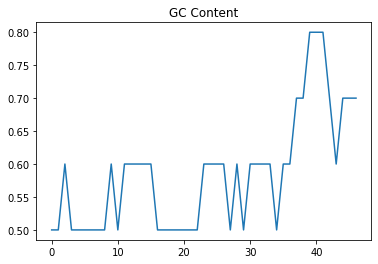

In [14]:
%matplotlib inline
# Define a function with sequence and window Size of 10
def calcGcContent(seq, winSize=10):
    gcValues = [] # Initializing the gcValues
    for i in range(len(seq)-winSize): 
        subSeq = seq[i:i+winSize] # Slice subsequence with starting point i to i+windowsSize
        numGc = subSeq.count('G') + subSeq.count('C') # Calculate G and C numbers inside the subSeq
        value = numGc/float(winSize) # Get the GC rate by dividing it into winSize
        gcValues.append(value) # Add the value found to gcValues
    return gcValues # Return the gcValues list

# Test Case 1
from matplotlib import pyplot # Call the plotting library
print("DNA: ", dnaSeq)
gcResults = calcGcContent(dnaSeq) # get the result from function above and save result to gcResults
pyplot.title("GC Content")
pyplot.plot(gcResults) # plot it
pyplot.show() # Show it